First few rows:
   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0         

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19416\1208483479.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)



Logistic Regression Performance Metrics:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       536
           1       0.75      0.73      0.74       318

    accuracy                           0.81       854
   macro avg       0.80      0.79      0.79       854
weighted avg       0.81      0.81      0.81       854



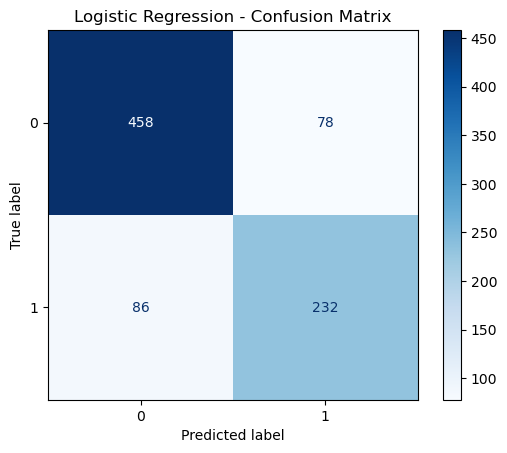


Decision Tree Performance Metrics:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       536
           1       0.96      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



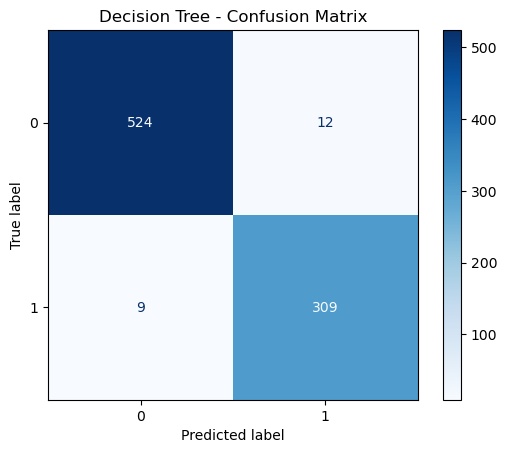

In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE

# Optional: Enables inline visualization for Jupyter Notebooks
# %matplotlib inline

# Load dataset
df = pd.read_csv(r'C:\Users\LENOVO\Documents\loan.csv')

# Preview data
print("First few rows:")
print(df.head())
print("\nColumns in dataset:", df.columns.tolist())  # Show all column names

# Strip whitespace from column names (important if hidden spaces exist)
df.columns = df.columns.str.strip().str.lower()

# Handle missing values
print("\nMissing values before filling:")
print(df.isnull().sum())
df.fillna(method='ffill', inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_encoder.fit_transform(df[col])

# Ensure the target column exists
if 'loan_status' not in df.columns:
    raise ValueError("Column 'Loan_Status' not found. Check for typos or extra spaces.")

# Feature and target split
# Feature and target split
X = df.drop('loan_status', axis=1)
y = df['loan_status']


# Check class balance
print("\nClass Distribution:\n", y.value_counts())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("\nResampled Class Distribution:\n", pd.Series(y_train_res).value_counts())

# Logistic Regression Model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_res, y_train_res)
log_preds = log_model.predict(X_test)

# Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_res, y_train_res)
tree_preds = tree_model.predict(X_test)

# Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Performance Metrics:")
    print(classification_report(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"{name} - Confusion Matrix")
    plt.grid(False)
    plt.show()

# Evaluate both models
evaluate_model("Logistic Regression", y_test, log_preds)
evaluate_model("Decision Tree", y_test, tree_preds)
